Date:22/10/2023

Author:Godwin Leslie Muhati

Dataset Source: North American Multi-model Ensemble (NMME) database.

Description: Sea surface tmepreture (SST) data hindcast data for the COLA-RSMAS-CCSM4 model 1981-2010 climatology.

In [3]:

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable


In [10]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.sst/dods'
ds =xr.open_dataset(url, decode_times=False)
sst_slice = ds['sst'][0, 0, 0, :, :]
ds


<xarray.Dataset>
Dimensions:  (S: 502, M: 10, X: 360, Y: 181, L: 12)
Coordinates:
  * S        (S) float32 264.0 265.0 266.0 267.0 ... 762.0 763.0 764.0 765.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
Data variables:
    sst      (S, L, M, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [20]:
ds['sst']

<xarray.DataArray 'sst' (S: 502, L: 12, M: 10, Y: 181, X: 360)>
[3925238400 values with dtype=float32]
Coordinates:
  * S        (S) float32 264.0 265.0 266.0 267.0 ... 762.0 763.0 764.0 765.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
Attributes:
    defaultvalue:   765.0
    pointwidth:     0
    standard_name:  sea_surface_temperature
    spatial_op:     Conservative remapping: 1st order: destarea: NCL: /homes/...
    long_name:      Sea Surface Temperature
    units:          Celsius_scale
    cell_methods:   time: mean
    lat:            89.5
    expires:        1698799320

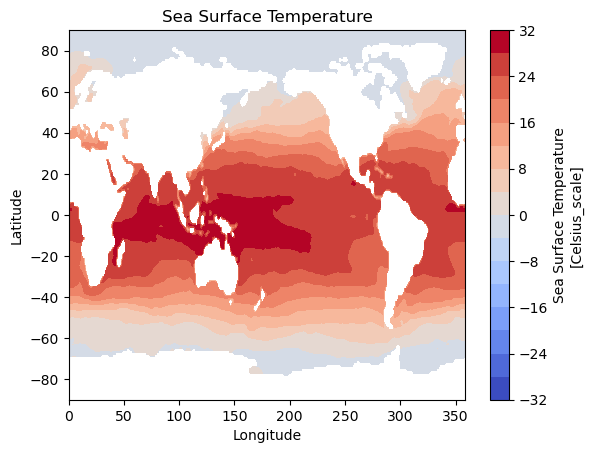

In [18]:
sst_slice = ds['sst'][0, 0, 0, :, :]
contour = sst_slice.plot.contourf(levels=20, cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Surface Temperature')
plt.show()


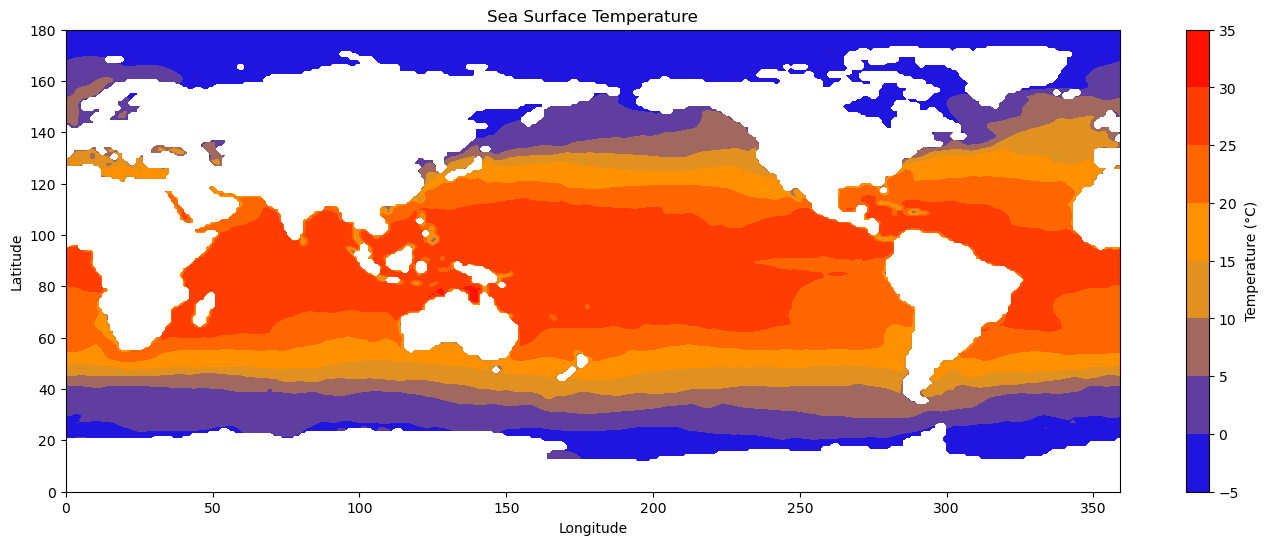

In [20]:
plt.figure(figsize=(17, 6))
colors = [(0, 'blue'), (0.5, 'orange'), (1, 'red')]
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom', colors, N=256)
cs = plt.contourf(sst_slice, cmap=cmap)  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Surface Temperature')
cbar = plt.colorbar(cs, label='Temperature (°C)')
plt.show()
